In [4]:
from diffusion_policy.dataset.real_image_dataset import RealImageDataset

In [1]:
dataset_path = "/home/tlips/Code/diffusion_policy/data/demo_place-cb"
import os 
os.path.exists(dataset_path)


True

In [5]:
n_latency_steps = 0
n_obs_steps = 2
n_action_steps = 8
horizon = 16

shape_meta = {
    "obs": {
        "camera_0": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "camera_1": {
            "shape": [3, 240, 320],
            "type": "rgb"
        },
        "robot_eef_pose_6d_rot": {
            "shape": [9],
            "type": "low_dim"
        },
        "gripper_width" :{
            "shape": [1],
            "type": "low_dim",
        }
    },
    "action": {
        "shape": [10]
    }
}

from omegaconf import OmegaConf
shape_meta = OmegaConf.create(shape_meta)

dataset = RealImageDataset(shape_meta=shape_meta, dataset_path=dataset_path, horizon=horizon, pad_before=n_obs_steps-1+n_latency_steps, pad_after=n_action_steps-1, n_obs_steps=n_obs_steps, n_latency_steps=n_latency_steps, use_cache=True, seed=42, val_ratio=0.00, max_train_episodes=None, delta_action=False)

Acquiring lock on cache.
Loading cached ReplayBuffer from Disk.
Loaded!
image_keys: ['camera_0', 'camera_1']


In [6]:

dataset.replay_buffer

/
 ├── data
 │   ├── action (37460, 10) float64
 │   ├── camera_0 (37460, 240, 320, 3) uint8
 │   ├── camera_1 (37460, 240, 320, 3) uint8
 │   ├── gripper_width (37460, 1) float64
 │   └── robot_eef_pose_6d_rot (37460, 9) float64
 └── meta
     └── episode_ends (300,) int64

In [7]:
dataset.get_validation_dataset().replay_buffer

image_keys: ['camera_0', 'camera_1']


/
 ├── data
 │   ├── action (37460, 10) float64
 │   ├── camera_0 (37460, 240, 320, 3) uint8
 │   ├── camera_1 (37460, 240, 320, 3) uint8
 │   ├── gripper_width (37460, 1) float64
 │   └── robot_eef_pose_6d_rot (37460, 9) float64
 └── meta
     └── episode_ends (300,) int64

In [11]:
print(list(dataset.replay_buffer.meta["episode_ends"]))

[116, 219, 341, 469, 594, 688, 815, 937, 1095, 1235, 1343, 1463, 1560, 1688, 1835, 1975, 2103, 2251, 2363, 2466, 2585, 2780, 2862, 2985, 3082, 3198, 3338, 3478, 3635, 3729, 3883, 4023, 4170, 4293, 4411, 4541, 4680, 4829, 4962, 5157, 5296, 5445, 5557, 5693, 5812, 5920, 6016, 6170, 6304, 6420, 6565, 6705, 6871, 7024, 7171, 7299, 7432, 7573, 7717, 7808, 7911, 8040, 8216, 8371, 8521, 8657, 8804, 8939, 9047, 9174, 9317, 9466, 9609, 9747, 9926, 10071, 10203, 10374, 10463, 10566, 10668, 10775, 10900, 11025, 11122, 11247, 11379, 11534, 11663, 11778, 11939, 12078, 12231, 12385, 12484, 12622, 12745, 12879, 13038, 13137, 13263, 13388, 13527, 13642, 13744, 13856, 13982, 14125, 14232, 14344, 14447, 14559, 14661, 14746, 14847, 14940, 15048, 15152, 15280, 15395, 15501, 15597, 15705, 15790, 15879, 15976, 16104, 16222, 16315, 16408, 16491, 16664, 16808, 16931, 17028, 17101, 17227, 17325, 17438, 17553, 17655, 17788, 17891, 18036, 18199, 18347, 18489, 18631, 18736, 18851, 18976, 19105, 19240, 19377, 1953

Episode 0
[ 0.07928201 -0.21452824  0.1929369   0.15776853  0.9874751   0.00142125
  0.98713615 -0.15775181  0.02601125]


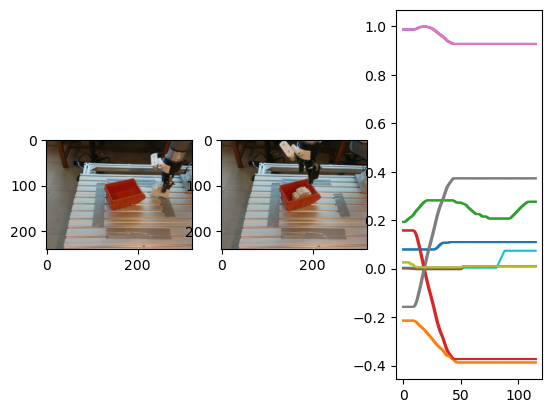

Episode 10
[ 0.17015782 -0.33754462  0.3134797  -0.65976905 -0.74721167 -0.07987194
 -0.74730944  0.6635679  -0.03473111]


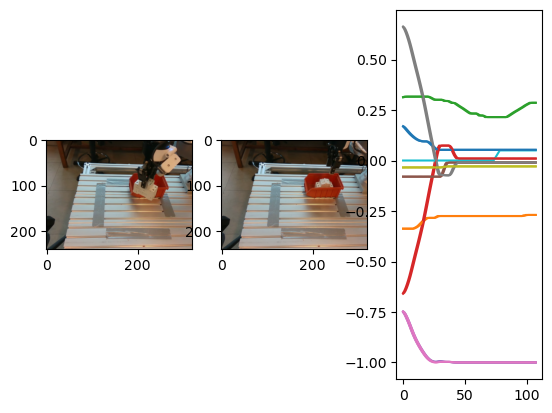

Episode 20
[ 0.23808093 -0.28588608  0.23787768 -0.54254815  0.83423447  0.09845992
  0.83985782  0.53636508  0.08337471]


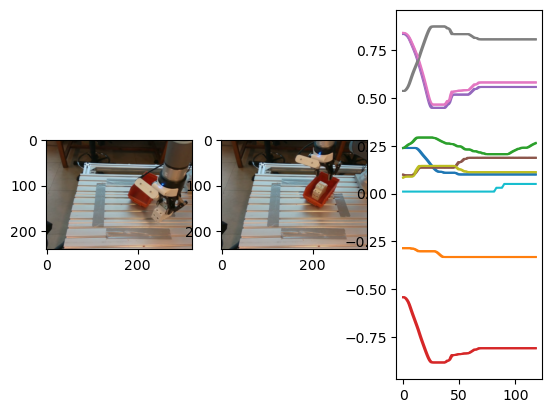

Episode 30
[ 0.24453451 -0.23995954  0.20905381  0.81972897 -0.10823749 -0.56243139
 -0.08598163 -0.99410849  0.06599591]


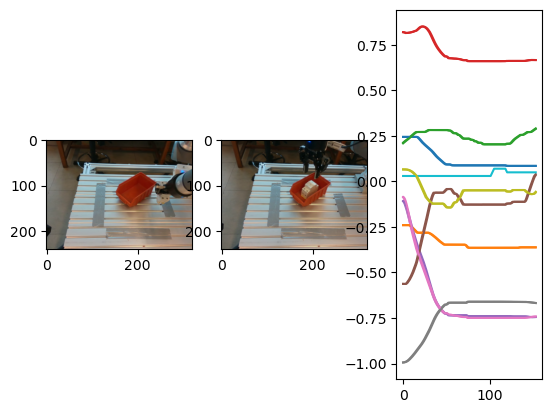

Episode 40
[ 0.1579059  -0.22502073  0.26876269 -0.53977232  0.84080625  0.04111801
  0.83091365  0.52431505  0.18621557]


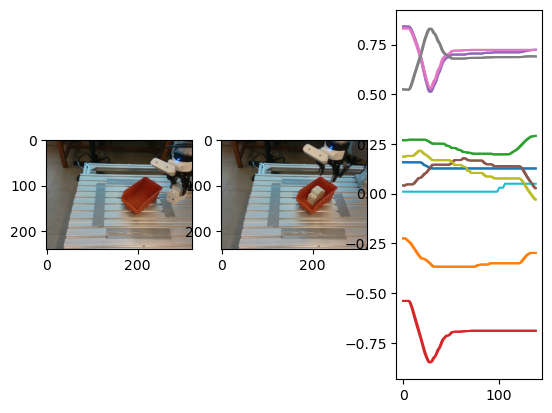

Episode 50
[ 0.0265779  -0.37612871  0.26772443  0.34568668  0.65085562 -0.67593468
  0.91631817 -0.38932362  0.09374503]


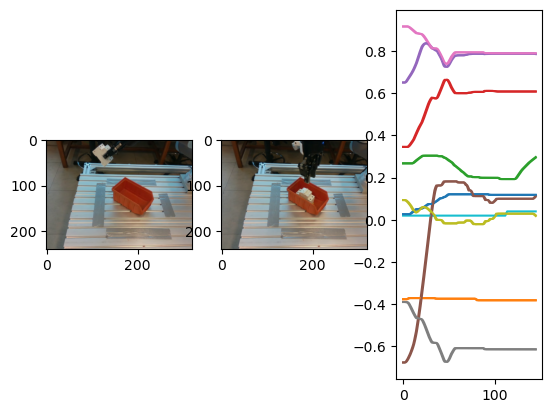

Episode 60
[ 0.197778   -0.28636911  0.2171473  -0.78175514 -0.6168523  -0.09138999
 -0.62039569  0.78416296  0.01405836]


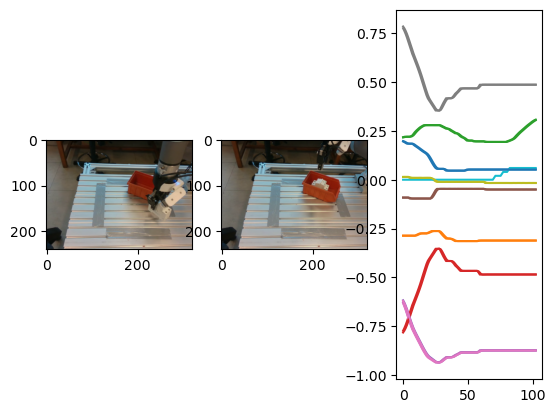

Episode 70
[ 0.17648495 -0.2908806   0.20511368 -0.59576035 -0.79388779 -0.12170365
 -0.79846504  0.60180116 -0.0169985 ]


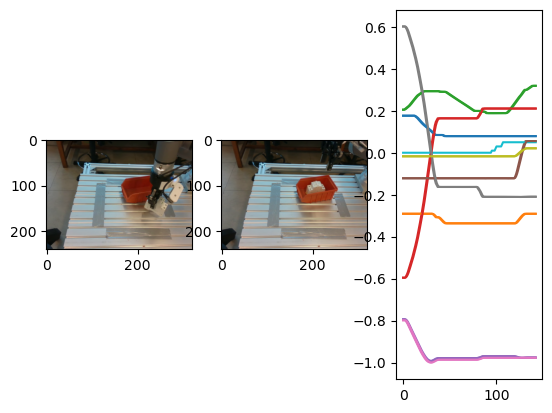

Episode 80
[ 0.21873732 -0.22223429  0.30656877 -0.99106756  0.13298867 -0.00995477
  0.13307204  0.99107212 -0.00823887]


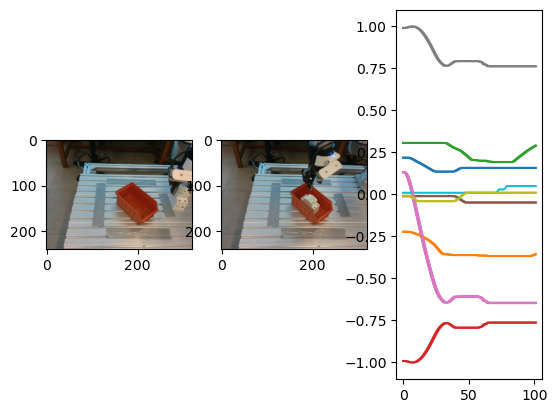

Episode 90
[ 0.06025095 -0.33936747  0.31664253 -0.99900226  0.00499506 -0.04437953
  0.00492875  0.99998657  0.00160347]


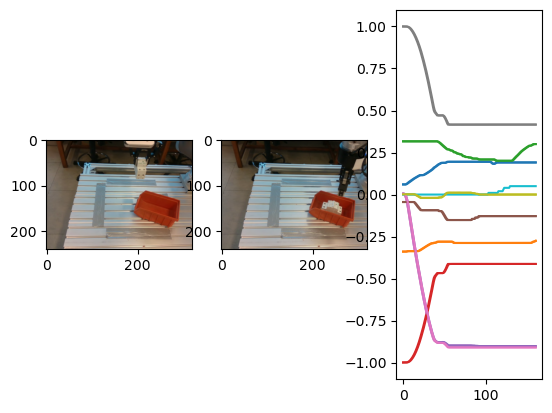

Episode 100
[ 0.19229226 -0.2563831   0.21898855  0.5188657  -0.85479507  0.01018649
 -0.85292266 -0.51845653 -0.06103905]


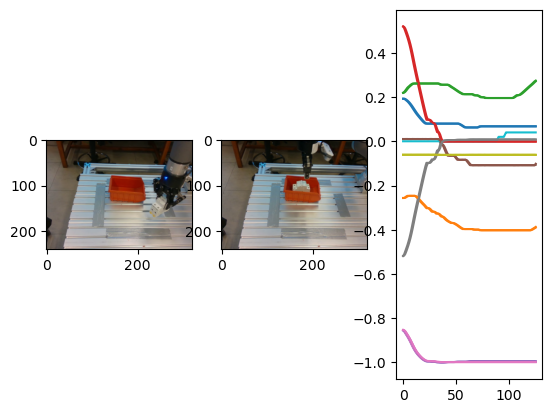

Episode 110
[ 0.18964863 -0.34572838  0.28096664 -0.99172451 -0.11840798 -0.04961895
 -0.11146479  0.98589359 -0.12485766]


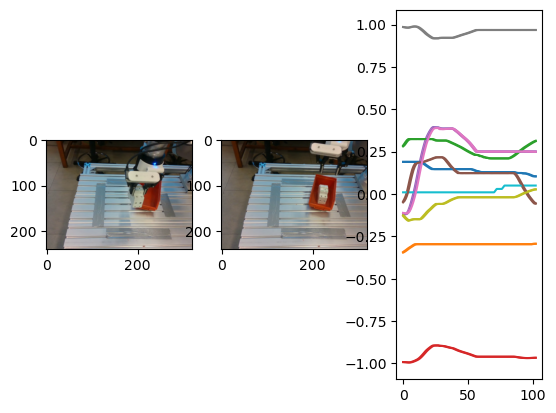

Episode 120
[ 0.24609515 -0.26563448  0.2683426  -0.87666464 -0.46431286 -0.12598682
 -0.46701855  0.88420221 -0.00895178]


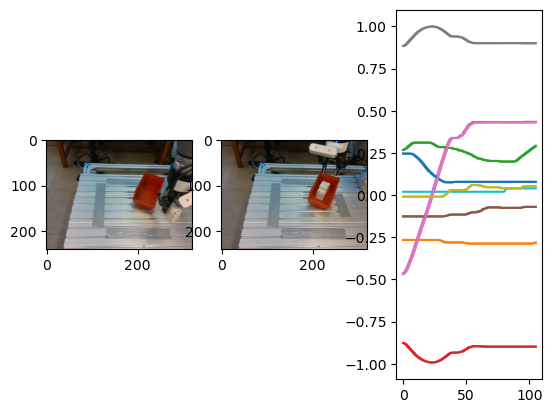

Episode 130
[ 0.06537997 -0.31491446  0.30114855 -0.69347918 -0.71847474 -0.05367187
 -0.71991934  0.69394688  0.01240458]


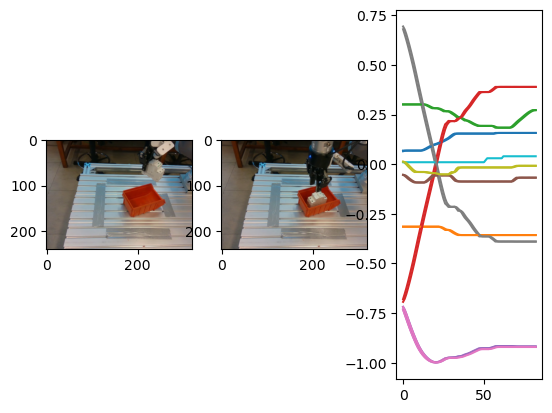

Episode 140
[ 0.0622717  -0.23425123  0.29439744  0.44979078  0.89023394  0.07191513
  0.89030434 -0.45331433  0.04317748]


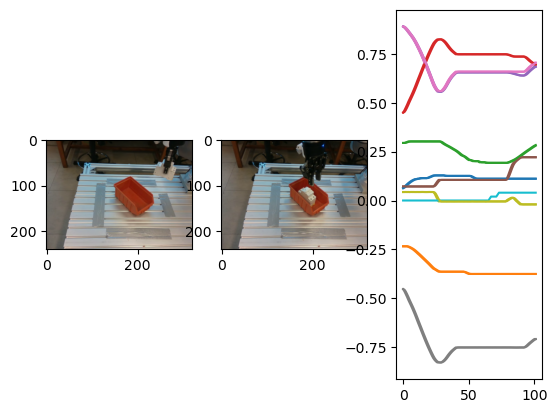

Episode 150
[ 0.07955902 -0.27602074  0.34153097 -0.93737701 -0.30620247 -0.16602526
 -0.30678794  0.9515059  -0.0227525 ]


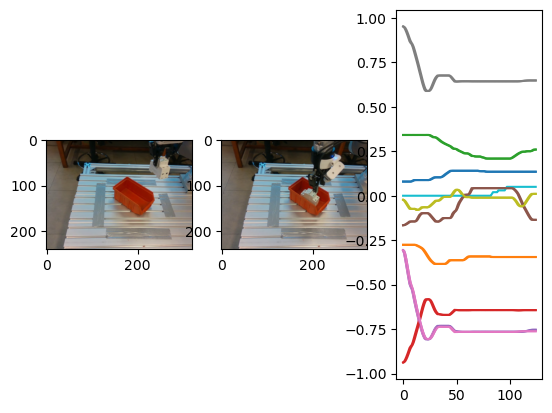

Episode 160
[ 0.22463419 -0.26833466  0.22088164  0.50491686  0.82321537  0.25956775
  0.8508774  -0.52525544  0.01069471]


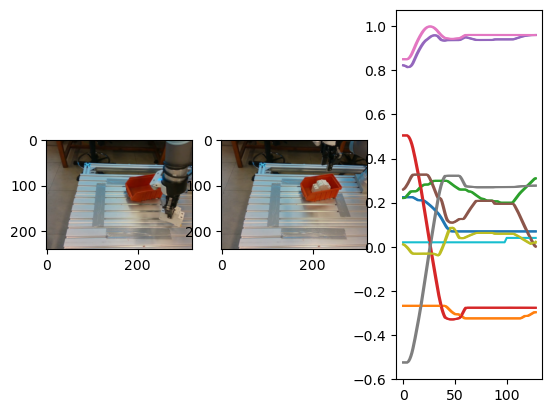

Episode 170
[ 0.07845225 -0.27417868  0.26446268  0.72613301 -0.68399551  0.06986414
 -0.68160529 -0.72946225 -0.05743736]


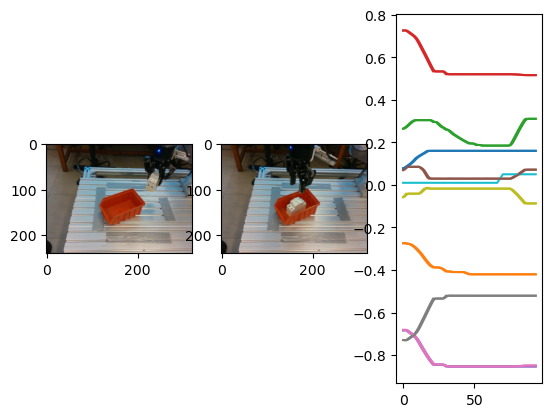

Episode 180
[-0.04520268 -0.34812915  0.18406561  0.15808293  0.97052126  0.18192928
  0.98675456 -0.16206356  0.0071296 ]


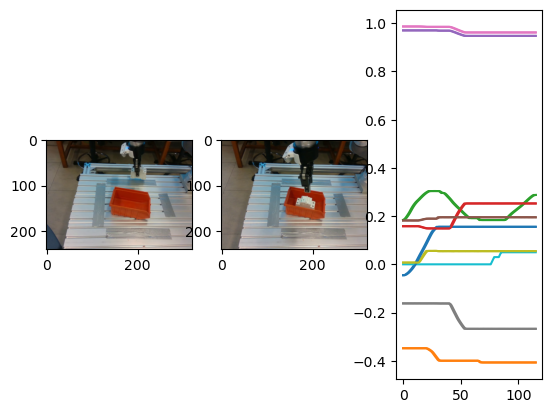

Episode 190
[ 0.0723257  -0.352484    0.33442945 -0.49148101  0.87084542  0.00864133
  0.87022063  0.49069158  0.04402067]


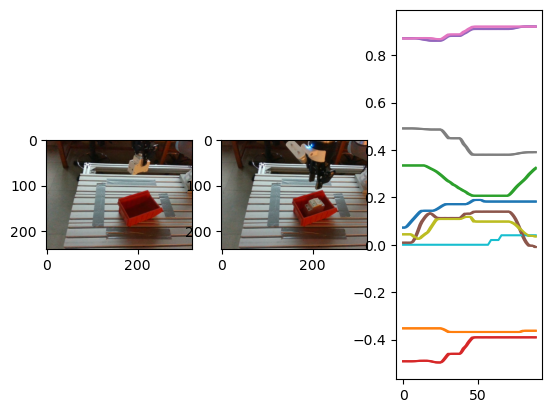

Episode 200
[ 0.17117645 -0.38285093  0.27358847  0.41903839  0.90660632  0.04971719
  0.90662055 -0.42077115  0.03147734]


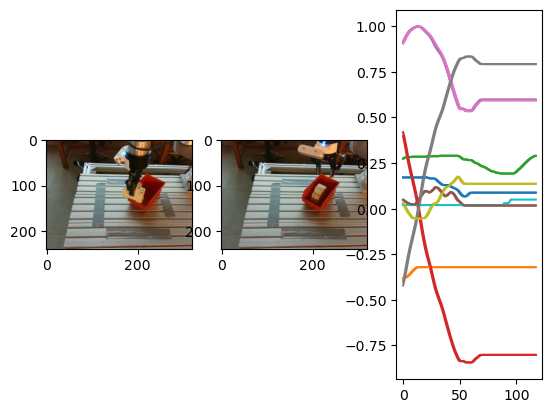

Episode 210
[ 0.12187451 -0.40294875  0.28059981  0.51597746  0.84443725  0.14385059
  0.85069324 -0.52483189  0.02953797]


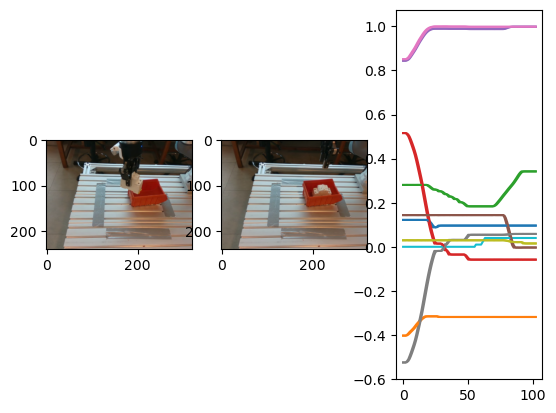

Episode 220


KeyboardInterrupt: 

In [11]:
buffer = dataset.replay_buffer
for episode_idx in range(0,len(buffer.meta.episode_ends),10):
    print(f"Episode {episode_idx}")
    episode = buffer.get_episode(episode_idx)
    # get all images "camera_0 from the episode
    images = episode["camera_0"]
    # show first image and last image
    import matplotlib.pyplot as plt
    # side by side
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(images[0])
    ax[1].imshow(images[-1])
    # display state and action 
    actions = episode["action"]
    eef_pose = episode["robot_eef_pose_6d_rot"]
    print(eef_pose[0])
    ax[2].plot(actions)
    ax[2].plot(eef_pose)
    plt.show()



(116, 9)
(116, 10)
(116, 1)


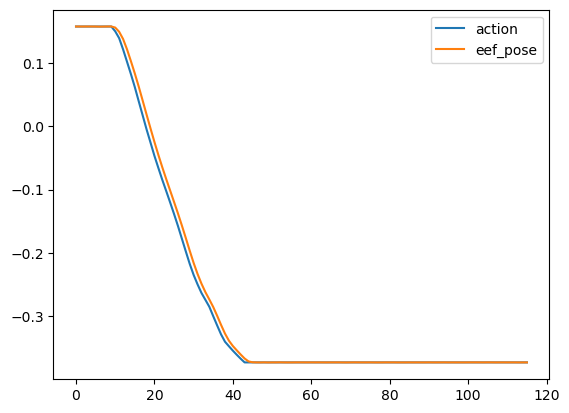

In [13]:
# detailed plot of observations vs actions
import numpy as np
import matplotlib.pyplot as plt
buffer = dataset.replay_buffer
episode_idx = 0
episode = buffer.get_episode(episode_idx)
actions = episode["action"]
eef_pose = episode["robot_eef_pose_6d_rot"]
print(eef_pose.shape)
print(actions.shape)
g = episode["gripper_width"]
# add new dim 
print(g.shape)
plt.plot(actions[:, 3])
plt.plot(eef_pose[:, 3])
plt.legend(["action", "eef_pose"])
